In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read our cleaned up data
df = pd.read_csv('data/public/merged_sgm_stud.tsv', sep='\t')

#df = df.head(20)
df.head()

,uni,Participant,Start,culture_problem,culture_solution,culture_helpless,culture_victim,cishet_problem,cishet_victim,cishet_solution,...,sgm_helpless,sgm_solution,school_problem,school_solution,school_victim,school_helpless,community_problem,community_solution,community_helpless,community_victim
0,school0,32,508,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,school0,32,697,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,school0,40,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,school0,40,601,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,school0,81,215,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [3]:
#The list of codes we're interested in. 
code_cols = ['culture_problem', 
             #'culture_absent', 
             'culture_solution', 
             'culture_helpless', 
             'culture_victim', 
             'cishet_problem', 
             'cishet_victim', 
             'cishet_solution', 
             #'cishet_absent', 
             'cishet_helpless', 
             'sgm_victim', 
             'sgm_problem', 
             'sgm_helpless', 
             #'sgm_absent', 
             'sgm_solution', 
             'school_problem', 
             'school_solution', 
             #'school_absent', 
             'school_victim', 
             'school_helpless', 
             'community_problem', 
             'community_solution', 
             'community_helpless', 
             #'community_absent', 
             'community_victim']

In [4]:
def s_id(row):
    return row['uni'] + str(row['Participant'])

def e_id(row):
    return row['s_id'] + '-' + str(row['Start'])

df['s_id'] = df.apply(s_id, axis=1)
df['e_id'] = df.apply(e_id, axis=1)

In [5]:
g = nx.Graph()

In [6]:
st = []
ex = []
last = ''

for c in code_cols:
    g.add_node(c, t='code')
    
for row in df.iterrows():
    g.add_node(row[1]['s_id'], t='student')
    if last != row[1]['s_id']:
        last = row[1]['s_id']
        st.append(last)
    
    g.add_node(row[1]['e_id'], t='excerpt')
    ex.append(row[1]['e_id'])
    
    g.add_edge(row[1]['s_id'], row[1]['e_id'])
    
    for c in code_cols:
        if row[1][c]:
            g.add_edge(row[1]['e_id'], c)
            

### For the full graph

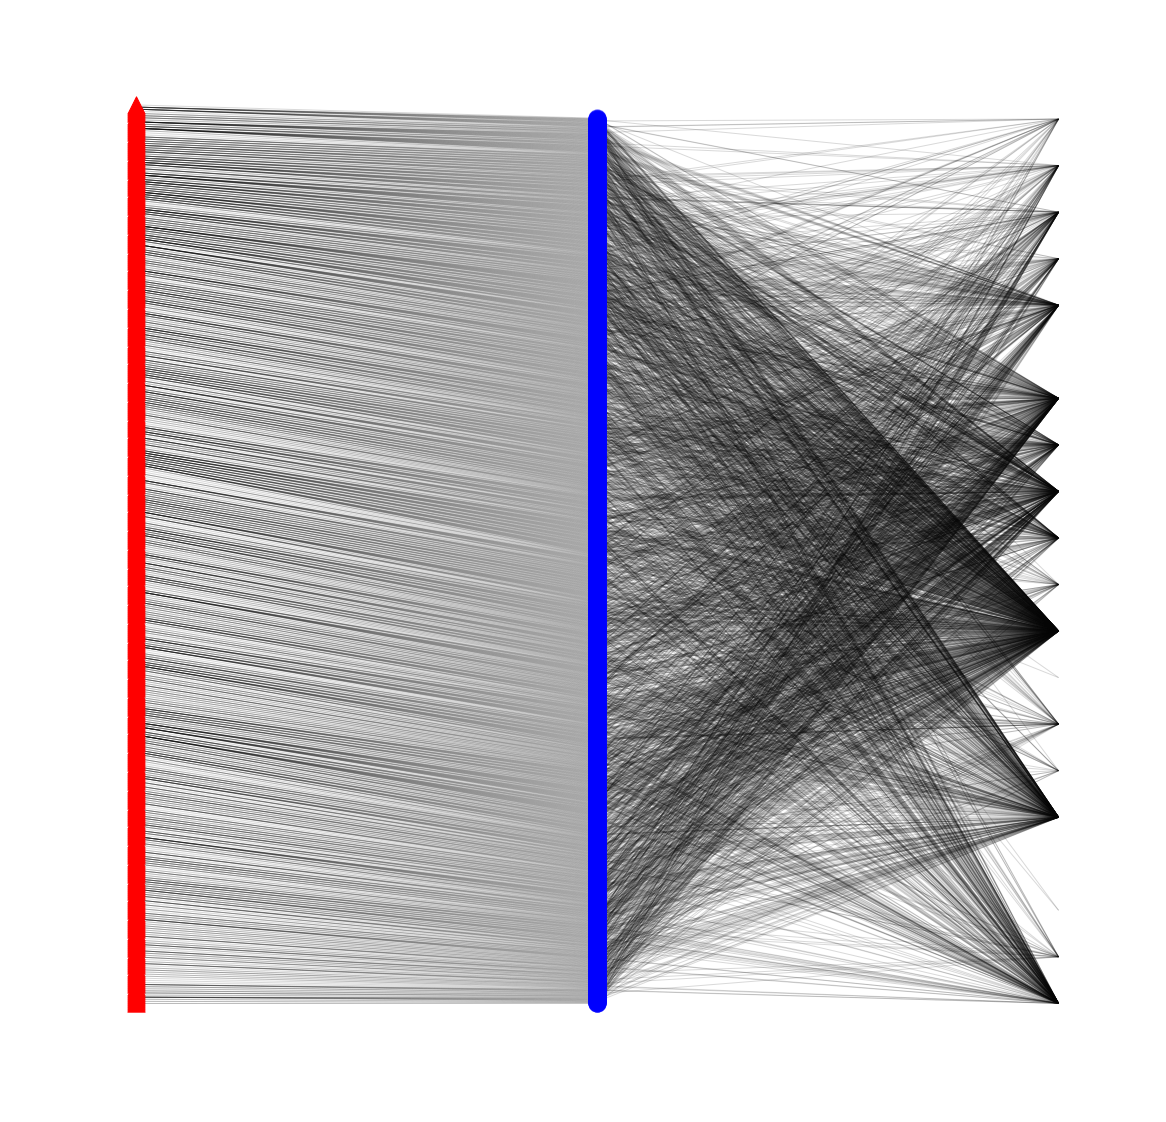

In [7]:
l = {}
for c in code_cols:
    l[c] = c

pos = dict()
pos.update( (n, (1, i*5.45)) for i, n in enumerate(st) )
pos.update( (n, (2, i)) for i, n in enumerate(ex) ) 
pos.update( (n, (3, i*120)) for i, n in enumerate(code_cols) ) 
plt.figure(figsize=(20,20))

nx.draw_networkx_nodes(g, pos, nodelist=st, node_color='r', 
                      node_shape='^')
nx.draw_networkx_nodes(g, pos, nodelist=ex, node_color='b', 
                      node_shape='o', alpha=0.5)
nx.draw_networkx_edges(g, pos, alpha=0.15)

plt.axis('off')
plt.show()
#plt.savefig('data/tripartite_unlabeled.png')

### For the partial graph

In [ ]:
l = {}
for c in code_cols:
    l[c] = c

pos = dict()
pos.update( (n, (1, i*3.6)) for i, n in enumerate(st) )
pos.update( (n, (1.5, i)) for i, n in enumerate(ex) ) 
pos.update( (n, (2, i)) for i, n in enumerate(code_cols) ) 
plt.figure(figsize=(20,20))

nx.draw_networkx_nodes(g, pos, nodelist=st, node_color='r', 
                      node_shape='^')
nx.draw_networkx_nodes(g, pos, nodelist=ex, node_color='b', 
                      node_shape='o', alpha=1)
nx.draw_networkx_edges(g, pos, alpha=1)

plt.axis('off')
plt.show()
#plt.savefig('data/tripartite_unlabeled.png')

### For both

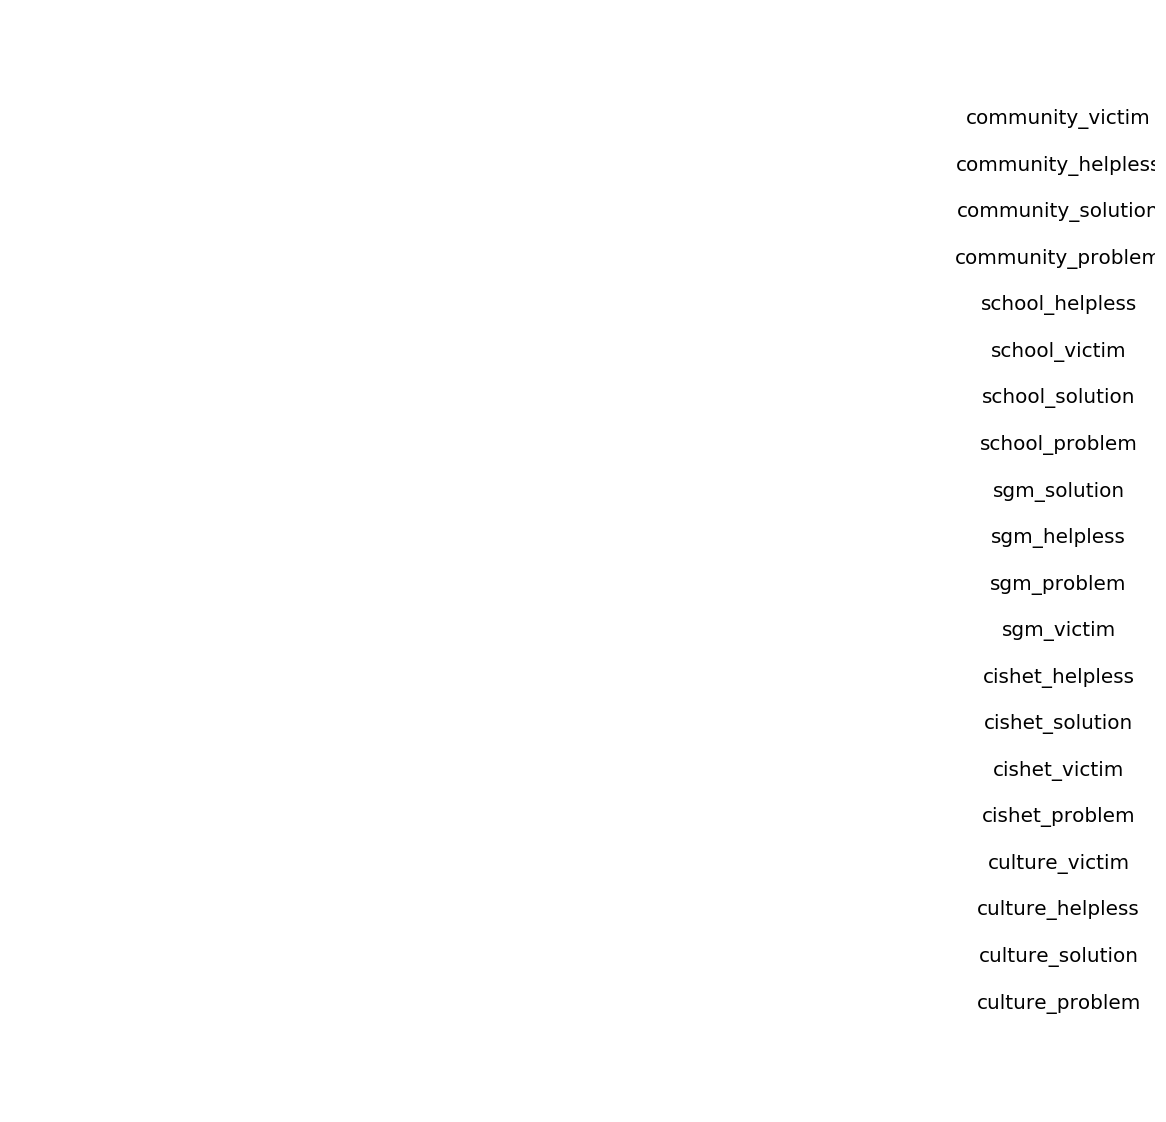

In [8]:
plt.figure(figsize=(20,20))
nx.draw_networkx_labels(g, pos, labels=l, font_size=20)
nx.draw_networkx_edges(g, pos, alpha=0)
plt.axis('off')
plt.show()
#plt.savefig('data/tripartite_labeles.png')

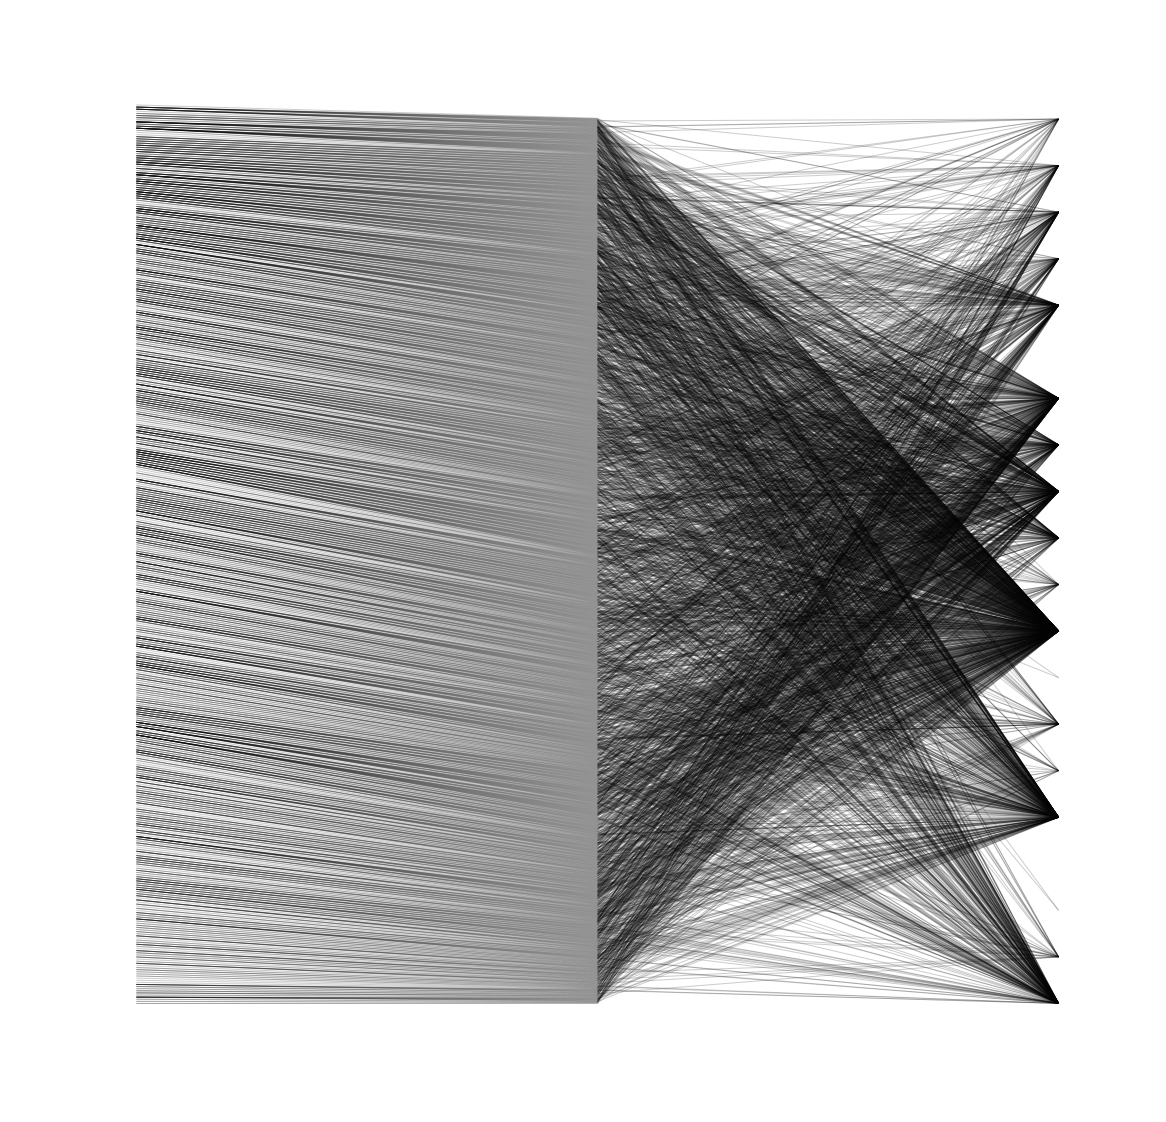

In [9]:
plt.figure(figsize=(20,20))
nx.draw_networkx_edges(g, pos, alpha=0.2)

plt.axis('off')
plt.show()

In [10]:
g = nx.Graph()
for c in code_cols:
    g.add_node(c, t='code')

for row in df.iterrows():
    g.add_node(row[1]['s_id'], t='student')

    for c in code_cols:
        if row[1][c]:
            g.add_edge(row[1]['s_id'], c)

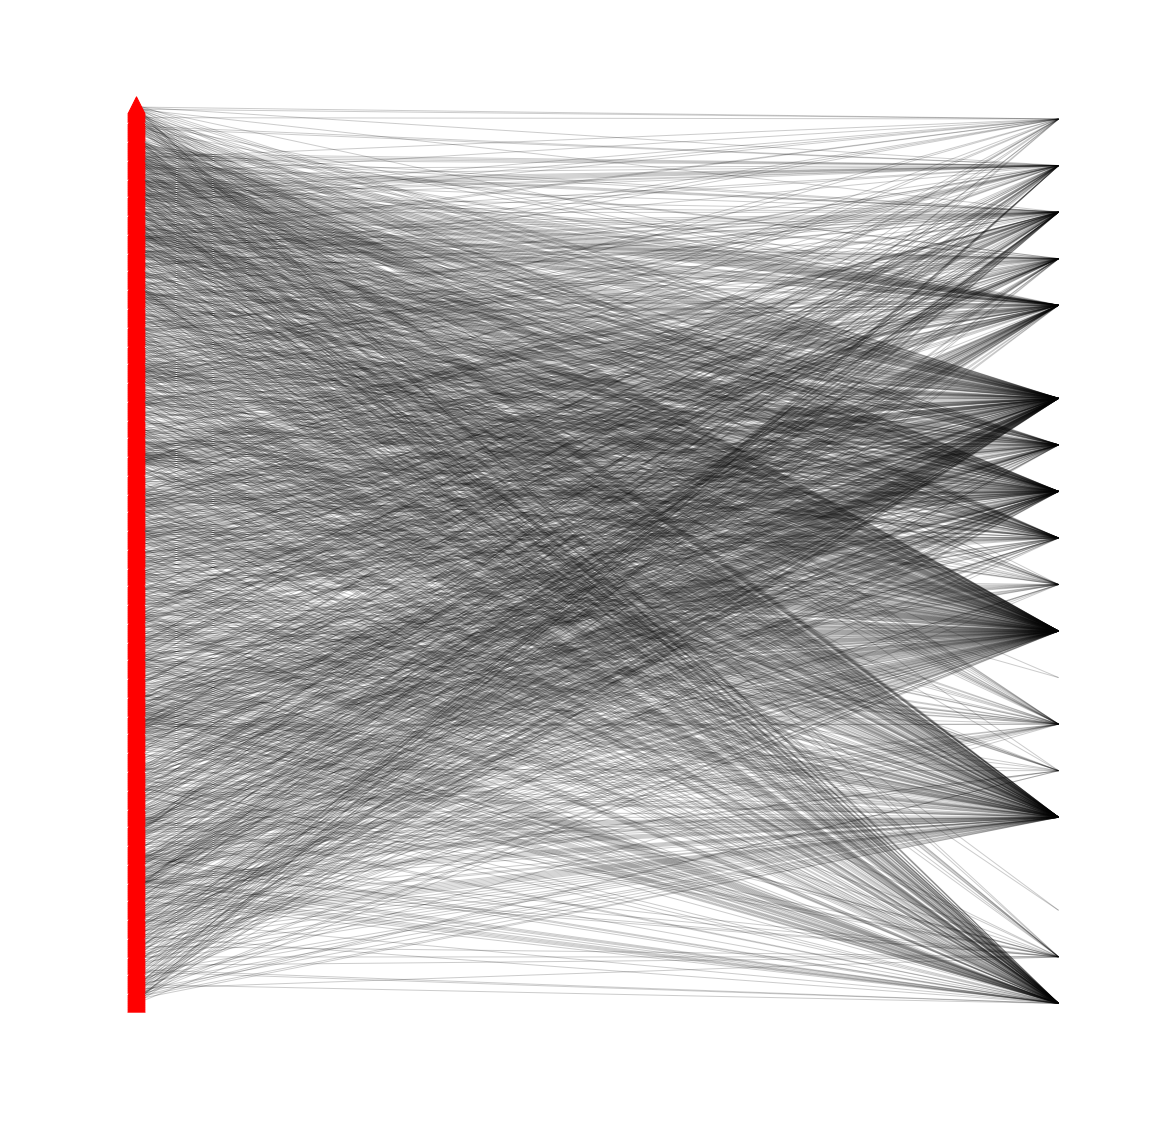

In [11]:
students = [n for (n, d) in g.nodes(data=True) if 
            (d['t'] == 'student')]
codes = [n for (n, d) in g.nodes(data=True) if  
         (d['t'] == 'code')]

l = {}
for c in codes:
    l[c] = c

plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(g, pos, nodelist=students, node_color='r', 
                      node_shape='^')
nx.draw_networkx_edges(g, pos, alpha=0.2)

plt.axis('off')
plt.show()